# Delivery platform analysis

## Introduction

Instacart is a grocery delivery platform where customers can place an order and have it delivered to them, similar to Uber Eats and DoorDash. The dataset we have used has modifications from the original. The dataset size has been reduced to perform calculations faster, and missing values and duplicates have been introduced. Care was taken to preserve the distributions of the original data when making the changes.

###  Data dictionary

There are five tables in the dataset. Below is a data dictionary listing the columns of each table and describing the data they contain.

- `instacart_orders.csv`: Each row corresponds to an order in the Instacart app.
    - `'order_id'`: Unique ID number identifying each order.
    - `'user_id'`: Unique ID number identifying each customer's account.
    - `'order_number'`: The number of times this customer has placed an order.
    - `'order_dow'`: Day of the week the order was placed (0 if Sunday).
    - `'order_hour_of_day'`: Hour of the day the order was placed.
    - `'days_since_prior_order'`: Number of days elapsed since this customer's previous order.
- `products.csv`: Each row corresponds to a unique product that customers can purchase.
    - `'product_id'`: Unique ID number identifying each product.
    - `'product_name'`: Name of the product.
    - `'aisle_id'`: Unique ID number identifying each grocery aisle category.
    - `'department_id'`: Unique ID number identifying each grocery department.
- `order_products.csv`: Each row corresponds to an item ordered in an order.
    - `'order_id'`: Unique ID number identifying each order.
    - `'product_id'`: Unique ID number identifying each product.
    - `'add_to_cart_order'`: Sequential order in which each item was added to the cart.
    - `'reordered'`: 0 if the customer has never ordered this product before, 1 if they have.
- `aisles.csv`
    - `'aisle_id'`: Unique ID number identifying each grocery aisle category.
    - `'aisle'`: Aisle name.
- `departments.csv`
    - `'department_id'`: Unique ID number identifying each grocery department.
    - `'department'`: Department name.

### Solution Plan

1. Import the libraries we need
2. Read the files and examine their information to understand their structure
3. Address any possible duplicate values
4. Address any possible missing values
5. Draw conclusions from what we can observe from the data.

##  Data description




In [1]:
# Import libriaries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Read data
instacart_orders= pd.read_csv(r"C:\Users\marco\Documents\tripleten_projects\final_projects\sprint3\instacart_orders.csv", sep=';')
products= pd.read_csv(r"C:\Users\marco\Documents\tripleten_projects\final_projects\sprint3\products.csv", sep=';')
aisles=pd.read_csv(r"C:\Users\marco\Documents\tripleten_projects\final_projects\sprint3\aisles.csv", sep=';')
departments= pd.read_csv(r"C:\Users\marco\Documents\tripleten_projects\final_projects\sprint3\departments.csv", sep=';')
order_products= pd.read_csv(r"C:\Users\marco\Documents\tripleten_projects\final_projects\sprint3\order_products.csv", sep=';') 

In [3]:
# Show instacart_orders information
instacart_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [4]:
# Show products information
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [5]:
# Show aisles information
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [6]:
# Show departments information
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


In [7]:
# Show order_products information
order_products.info()
print()
# head() is used because it was noticed that info() doesn't show the 'non-null count' column, which led to the assumption that the DataFrame is empty. However, it is confirmed that it does have information
print(order_products.head())                              
print()
print(order_products.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB

   order_id  product_id  add_to_cart_order  reordered
0   2141543       11440               17.0          0
1    567889        1560                1.0          1
2   2261212       26683                1.0          1
3    491251        8670               35.0          1
4   2571142        1940                5.0          1

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


### Conclusions


When attempting to read the data for the first time, we noticed that the file is separated by `';'`, so we had to add `'sep=';'` to the `read_csv()` function.

1. `'instacart_orders'`: We can see that the `'days_since_prior_order'` column has missing information. This might be because the number of days since the last order can vary significantly between customers, and if it's their first time ordering, that information could be missing. The `'order_hour_of_day'` column is of type int64; we should check if it would be beneficial to convert it to datetime. The `'days_since_prior_order'` column is of type float64; we should review whether decimal values are considered or not.
2. `'products'`: We observed that the `product_name` column has missing information; we need to find out why.
3. `'aisles'`: At first glance, the information with `info()` looks complete, and the data type is correct.
4. `'departments'`: Similarly to the previous DataFrame, the information provided by `info()` appears complete and correct.
5. `'order_products'`: When printing the column, the non-null count information does not appear, so we use `head()` and the `isnull()` method to check the DataFrame's contents.

It is observed that the `"id"` columns are the ones that establish relationships among the DataFrames. These will help us combine information if needed using the `merge()` method."

## Data cleansing and wrangling

### Work plan

We will review each DataFrame, starting by checking the data types and their format in the DataFrame to see if it matches the data type it was saved in. Next, we will look for duplicate values, determine why they are duplicated, and decide whether to keep or remove the data. Finally, we will review the missing values and analyze whether they can be filled in with the rest or if they will need to be removed, depending on their importance in the set.

### Find and remove duplicate values

#### `orders` data frame

In [8]:
# Look for duplicated orders

# The number of duplicated rows is printed
print(instacart_orders['order_id'].duplicated().sum()) 
print()

# A filtered DataFrame is created with the duplicated rows
dup_instacart_orders=instacart_orders[instacart_orders.duplicated()] 

# The duplicated rows are examined
print(dup_instacart_orders) 

15

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742   183220            48        

It is observed that all the duplicate rows have a record from Wednesday at 2 in the morning.

In [9]:
# A query is printed from the DataFrame where the day is Wednesday and the time is 2, sorting the values by user_id to see the duplicates together. We print the first 20 values to examine how the duplicates are
instacart_orders.query("order_dow == 3 and order_hour_of_day == 2").sort_values(by='order_id').head(20)


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
452265,191,176417,44,3,2,6.0
468324,222962,54979,59,3,2,3.0
247867,238782,196224,6,3,2,3.0
417106,248760,204961,25,3,2,15.0
328565,264348,34806,6,3,2,5.0
316583,272079,121263,7,3,2,3.0
210068,284770,137352,7,3,2,8.0
359625,332561,201301,1,3,2,NaN
195093,350018,142887,6,3,2,1.0
29129,353088,46038,4,3,2,11.0


It can be observed that in the orders with order IDs 2125197 and 2845099, the rows are completely duplicated, so it's better to delete the fully duplicated rows.

In [10]:
# We remove the duplicated orders
instacart_orders = instacart_orders.drop_duplicates().reset_index()

In [11]:
# We check for duplicated rows
instacart_orders.duplicated().sum()

0

In [12]:
# We recheck for duplicate order IDs only
instacart_orders['order_id'].duplicated().sum()

0

Conclusions

It is observed that the duplicated rows were repeated orders, so the duplicate could be removed

#### `products` data frame

In [13]:
# We check for completely duplicated rows
print(products.duplicated().sum()) 
print()
products.head()

0



,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [14]:
# Check for duplicated department IDs
products['department_id'].duplicated().sum()

49673

In [15]:
# Check only for duplicated product names

# Names are converted to uppercase
products['product_name'] = products['product_name'].str.upper() 

# Check the first 5 names to confirm the change
print(products.head())
print()

# Check the number of duplicated product names
print(products['product_name'].duplicated().sum())
print()

# Get the duplicated products from the DataFrame
print(products[products['product_name'].duplicated()])
print()

# Sum the number of products without a name
print(products['product_name'].isna().sum())
print()

# Get the list of products without a name
print(products[products['product_name'].isna()])


   product_id                                       product_name  aisle_id  \
0           1                         CHOCOLATE SANDWICH COOKIES        61   
1           2                                   ALL-SEASONS SALT       104   
2           3               ROBUST GOLDEN UNSWEETENED OOLONG TEA        94   
3           4  SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...        38   
4           5                          GREEN CHILE ANYTIME SAUCE         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13  

1361

       product_id                                     product_name  aisle_id  \
71             72                                              NaN       100   
109           110                                              NaN       100   
296           297                                              NaN       100   
416           417                                              NaN       100   
436       

In [16]:
# Check for duplicated product names that are not missing

# Store a query of duplicated products that are not NaN
dup_products = products.query('product_name.notna() and product_name.duplicated(keep=False)')

# Print the first 20 in alphabetical order to observe how they are duplicated
print(dup_products.sort_values(by='product_name').head(20))
print()

# Get the list of duplicates and their number of occurrences in the DataFrame
print(dup_products['product_name'].value_counts())


       product_id                               product_name  aisle_id  \
23339       23340  18-IN-1 HEMP PEPPERMINT PURE-CASTILE SOAP        25   
31844       31845  18-IN-1 HEMP PEPPERMINT PURE-CASTILE SOAP        25   
19941       19942            AGED BALSAMIC VINEGAR OF MODENA        19   
13152       13153            AGED BALSAMIC VINEGAR OF MODENA        19   
24830       24831         ALBACORE SOLID WHITE TUNA IN WATER        95   
22582       22583         ALBACORE SOLID WHITE TUNA IN WATER        95   
9037         9038                     AMERICAN CHEESE SLICES        21   
515           516                     AMERICAN CHEESE SLICES        21   
49530       49531               ANCHOVY FILLETS IN OLIVE OIL        95   
12325       12326               ANCHOVY FILLETS IN OLIVE OIL        95   
27802       27803                         APRICOT ENERGY BAR         3   
41221       41222                         APRICOT ENERGY BAR         3   
45230       45231                     

Conclusions

Many rows were found where the product was repeated, and others where the product has no name. The repeated rows are ignored because they have different 'product_id' numbers, which could indicate they are different products when conducting the analysis.

#### `departments` data frame

In [17]:
# Check for completely duplicated rows
print(departments.duplicated().sum())

0


In [18]:
# Check only for duplicated product IDs
print(departments['department_id'].duplicated().sum())

0


No errors are found.

#### `aisles` data frame

In [19]:
# Check for completely duplicated rows
print(aisles.duplicated().sum())

0


In [20]:
# Check only for duplicated product IDs
print(aisles['aisle_id'].duplicated().sum())

0


No errors are found.

#### `order_products` data frame

In [21]:
# Check for completely duplicated rows
print(order_products.duplicated().sum())

0


In [22]:
# Recheck for any other tricky duplicates
cols= [order_products.columns]

for col in cols:
    print(order_products[col].duplicated().sum())

0


No errors found.

### Finding and removing missing values

While working with duplicated values, we noticed that we also need to look for missing values:

The 'product_name' column from the products table.
The 'days_since_prior_order' column from the orders table.
The 'add_to_cart_order' column from the order_products table.

#### `products` data frame

In [23]:
# Look for missing values in the column 'product_name'
products[products['product_name'].isna()]

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


There are 1258 rows where there is no product name, and it seems that they all belong to the same aisle ID and department ID

In [24]:
# The NaN values from the column are extracted, and the count of each value is displayed
products[products['product_name'].isna()]['aisle_id'].value_counts()

aisle_id
100    1258
Name: count, dtype: int64

It is confirmed that all the products belong to the same aisle.

In [25]:
# The same procedure is repeated, but with the department column
products[products['product_name'].isna()]['department_id'].value_counts()

department_id
21    1258
Name: count, dtype: int64

All products belong to the same department, and the count is the same as in the aisles

In [26]:
# We use the Department and Aisles DataFrames to check the data for aisle with ID 100 and department with ID 21
print(aisles.query('aisle_id == 100'))
print()
print(departments.query('department_id == 21')) 

    aisle_id    aisle
99       100  missing

    department_id department
20             21    missing


It is discovered that information is missing for all products related to that department and aisle

In [27]:
# We fill the missing product names with 'Unknown'
products['product_name'].fillna('Unknown', inplace=True)

# Check if there are still any null values left
print(products['product_name'].isna().sum())

0


It was discovered that information was missing for all products related to department 21, aisle 100, so it was decided to label it as 'unknown' to be able to use the IDs and not have to delete data, since it crosses between the tables and might still provide useful information.

#### `orders` data frame

In [28]:
# Finding the missing values

# Check the number of missing values
print(instacart_orders['days_since_prior_order'].isna().sum())

# Get the rows with missing values
print(instacart_orders[instacart_orders['days_since_prior_order'].isna()])

28817
         index  order_id  user_id  order_number  order_dow  order_hour_of_day  \
28          28    133707   182261             1          3                 10   
96          96    787445    25685             1          6                 18   
100        100    294410   111449             1          0                 19   
103        103   2869915   123958             1          4                 16   
104        104   2521921    42286             1          3                 18   
...        ...       ...      ...           ...        ...                ...   
478880  478895   2589657   205028             1          0                 16   
478881  478896   2222353   141211             1          2                 13   
478907  478922   2272807   204154             1          1                 15   
478911  478926   2499542    68810             1          4                 19   
478930  478945   1387033    22496             1          5                 14   

        days_since_pr

In [29]:
# We check if there's any missing value where it wasn't the first order
print(instacart_orders.query('days_since_prior_order.isna() and order_number > 1'))

Empty DataFrame
Columns: [index, order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


All missing values in 'days_since_prior_order' are because it's the customer's first purchase, so this should not be an issue since it's relevant information.

#### `order_products` data frame

In [30]:
# Finding the missing values
order_products.info()
print()

# Get the sum of missing values in the columns
print(order_products.isna().sum())
print()

# Get the rows with missing values
print(order_products[order_products['add_to_cart_order'].isna()])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                NaN          0
9926      1968313       43867                NaN          0
14394     2926893       11688                NaN          0
16418     1717990        4142                NaN          0
30114     1959075       42828                NaN          1
...           ...         ...                ...        ...
4505662   1800005        7411                NaN          0
4511400   1633337         260                NaN 

In [31]:
# Check the maximum and minimum values in the 'add_to_cart_order' column
print('The maximum value is:', order_products['add_to_cart_order'].max())
print('The minimum value is:', order_products['add_to_cart_order'].min())

The maximum value is: 64.0
The minimum value is: 1.0


There are 836 rows with missing data in the `'add_to_order_cart'` column. The values are in the range from 1 to 64, depending on the order in which they were added to the cart.

In [32]:
# Store all the order IDs that have a missing value in 'add_to_cart_order'.
order_with_nan=order_products.query('add_to_cart_order.isna()')
order_with_nan

,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,NaN,0
9926,1968313,43867,NaN,0
14394,2926893,11688,NaN,0
16418,1717990,4142,NaN,0
30114,1959075,42828,NaN,1
...,...,...,...,...
4505662,1800005,7411,NaN,0
4511400,1633337,260,NaN,0
4517562,404157,9517,NaN,0
4534112,1673227,17835,NaN,0


In [33]:
# Do all orders with missing values have more than 64 products?

# Group the orders by 'order_id' and count the number of products in each order, then sort in ascending order
print(order_with_nan.groupby(by='order_id')['product_id'].count().sort_values())

order_id
9310        1
747668      1
1598369     1
1677118     1
2170451     1
           ..
1959075    34
171934     40
2136777    44
3308010    51
61355      63
Name: product_id, Length: 70, dtype: int64


Orders with missing values have varying numbers of products, ranging from 1 to 63.

In [34]:
# Replace missing values in the 'add_to_cart_order' column with 999 and convert the column to integer type.
# Fill missing values with '999'
order_products['add_to_cart_order'].fillna(999, inplace=True)

# Convert the data type to int64
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype('int')

# Check that there are no more missing values
print(order_products.isna().sum())

# Check the data type information
order_products.info()


order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int32
 3   reordered          int64
dtypes: int32(1), int64(3)
memory usage: 121.4 MB


The missing data was replaced with the value 999 so that they can still be considered, and the data type for the 'add_to_cart_order' column was changed to an integer.

### Conclusions

Although there were several groups of missing data, we couldn't eliminate this information because it's connected across dataframes, which could disrupt our data analysis.

## Data analysis


### Verify that the values for `'order_hour_of_day'` and `'order_dow'` make sense.

In [35]:
# Extract the unique values from the 'order_hour_of_day' column and sort them in ascending order
instacart_orders['order_hour_of_day'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [36]:
# Extract the unique values from the 'order_dow' column and sort them in ascending order.
instacart_orders['order_dow'].sort_values().unique()

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

The correct values in the columns are confirmed.

### For each hour of the day, how many people place orders?

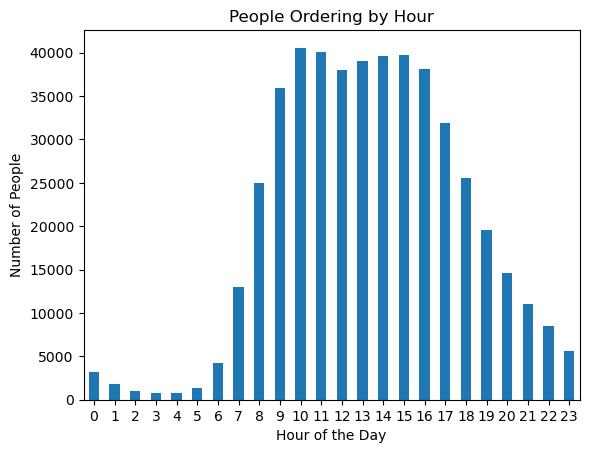

In [37]:
# Group the data by the 'order_hour_of_day' column and count the 'user_id' column
orders_by_hour = instacart_orders.groupby(by='order_hour_of_day')['user_id'].count()
orders_by_hour.plot(
    kind='bar',
    title='People Ordering by Hour',
    xlabel='Hour of the Day',
    ylabel='Number of People',
    rot=0
)
plt.show()

It can be observed that the peak hours are between 9 AM and 4 PM. It is also noted that during nighttime hours, there is little to no activity compared to daytime.

### Which day of the week do people buy groceries?

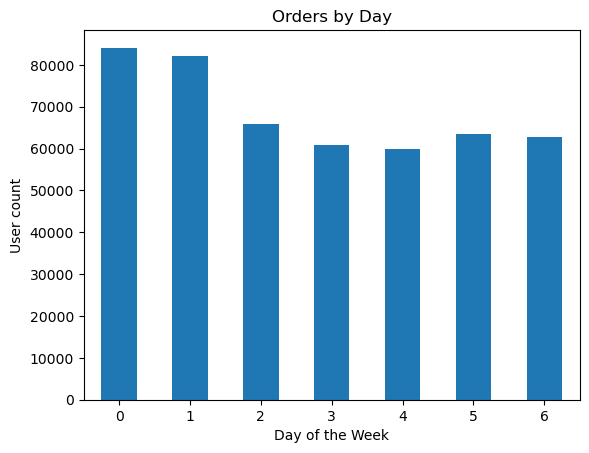

In [38]:
# Group by days of the week and count the number of orders by user
orders_by_day= instacart_orders.groupby(by='order_dow')['user_id'].count() 
orders_by_day.plot(
kind='bar',
title='Orders by Day',
xlabel='Day of the Week',
ylabel='User count',
rot=0
)

plt.show()

We can observe that Monday and Tuesday are the days with the most interactions during the week. From Wednesday to Sunday, activity decreases but remains somewhat steady, with Friday being the day with the lowest activity.

### How long do people wait before placing another order?

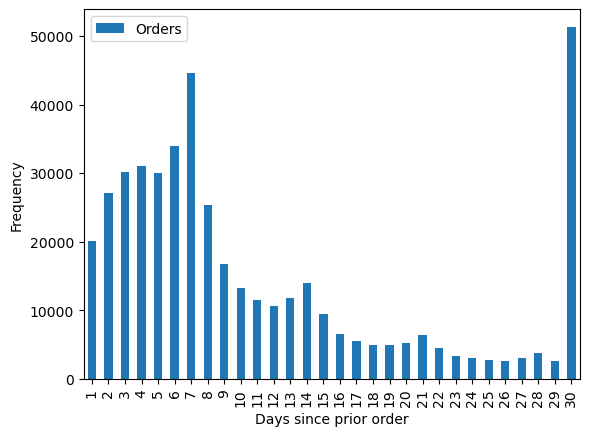

In [39]:
# Rows with days greater than 0 are extracted.
days_til_new_order= instacart_orders.query('days_since_prior_order > 0')
days_til_new_order= days_til_new_order.groupby(by='days_since_prior_order')['order_id'].count().reset_index()
days_til_new_order['days_since_prior_order']=days_til_new_order['days_since_prior_order'].astype('int')
days_til_new_order.plot(
    x='days_since_prior_order',
    y='order_id',
    kind='bar',
    xlabel='Days since prior order',
    ylabel='Frequency'
)
plt.legend(['Orders'])
plt.show()

It is observed that most people wait 30 days before placing another order. The area of the graph where most people are concentrated is between 1 and 8 days.

### Difference between Wednesdays and Saturdays for `'order_hour_of_day'`

In [40]:
# Get the rows for orders made on Wednesday
wed=instacart_orders.query('order_dow == 2') 
# Count the number of orders per hour
wed=wed.groupby('order_hour_of_day')['order_id'].count() 
print(wed.head(10))


order_hour_of_day
0     462
1     240
2     136
3     104
4     109
5     196
6     653
7    1900
8    3485
9    5057
Name: order_id, dtype: int64


In [41]:
# The same process is repeated for the dataframe from the previous case, this time for Saturday.
sat=instacart_orders.query('order_dow == 5')
sat=sat.groupby('order_hour_of_day')['order_id'].count() 
print(sat.head(10))

order_hour_of_day
0     459
1     219
2     123
3      99
4     118
5     229
6     654
7    1933
8    3373
9    4794
Name: order_id, dtype: int64


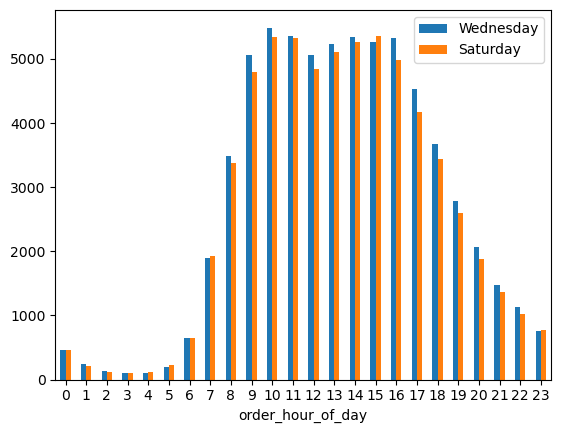

In [42]:
# The two dataframes are merged to have the values together and plot each column
wed_and_sat= pd.concat([wed, sat],axis='columns')
wed_and_sat.columns= ['wed_order_hour_of_day','sat_order_hour_of_day']
wed_and_sat.plot(
    kind='bar',
    rot=0
)
plt.legend(['Wednesday','Saturday'])
plt.show()

It can be seen that the behaviors are quite similar, although Wednesday typically has a slightly higher number of orders.

### What is the distribution for the number of orders per customer?

In [43]:
# Get the highest order number to know how many orders each user has made
orders_by_client = instacart_orders.groupby('user_id').max().reset_index()

orders_by_user = orders_by_client[['user_id', 'order_number']] # Extract these two columns
print(orders_by_user)
print()
print("The highest order number is", orders_by_user['order_number'].max(), "and the lowest order number is", orders_by_user['order_number'].min()) # Find the range of orders

        user_id  order_number
0             2             4
1             4             6
2             5             4
3             6             4
4             7            19
...         ...           ...
157432   206203             2
157433   206206            66
157434   206207            14
157435   206208            34
157436   206209            13

[157437 rows x 2 columns]

The highest order number is 100 and the lowest order number is 1


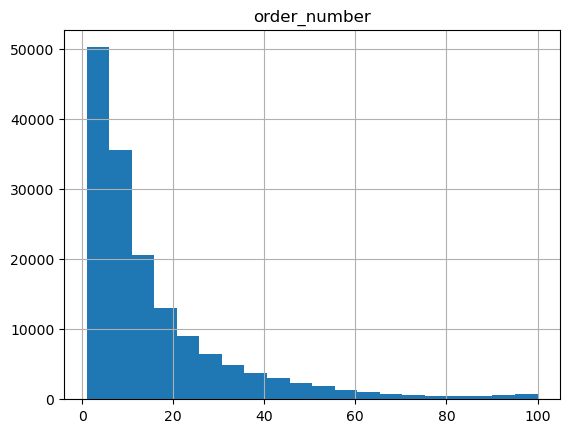

In [44]:
orders_by_user.hist(
    column='order_number',
    bins=20
)
plt.show()

Most customers place between 0 and 10 orders. From 10 to 40, there's still a noticeable number, but beyond 40 orders, the number of users is very low.

### What are the 20 most popular products (show their ID and name)?

In [45]:
# Group products by ID, get the count of occurrences, and sort the values.
top_products= order_products.groupby(by='product_id').count().reset_index().sort_values(by='order_id',ascending=False)

top_products.head(20)

,product_id,order_id,add_to_cart_order,reordered
22808,24852,66050,66050,66050
12025,13176,53297,53297,53297
19370,21137,37039,37039,37039
20077,21903,33971,33971,33971
43271,47209,29773,29773,29773
43788,47766,24689,24689,24689
43663,47626,21495,21495,21495
15364,16797,20018,20018,20018
24047,26209,19690,19690,19690
25556,27845,19600,19600,19600


In [46]:
# Join with the products dataframe to get the product names, using 'product_id' as the joining key.
top_products_names=top_products.merge(products, on='product_id', how='left') 
top_products_names.head(20)

,product_id,order_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,24852,66050,66050,66050,BANANA,24,4
1,13176,53297,53297,53297,BAG OF ORGANIC BANANAS,24,4
2,21137,37039,37039,37039,ORGANIC STRAWBERRIES,24,4
3,21903,33971,33971,33971,ORGANIC BABY SPINACH,123,4
4,47209,29773,29773,29773,ORGANIC HASS AVOCADO,24,4
5,47766,24689,24689,24689,ORGANIC AVOCADO,24,4
6,47626,21495,21495,21495,LARGE LEMON,24,4
7,16797,20018,20018,20018,STRAWBERRIES,24,4
8,26209,19690,19690,19690,LIMES,24,4
9,27845,19600,19600,19600,ORGANIC WHOLE MILK,84,16


In [47]:
top_products_names[['product_name','product_id']].head(20)

,product_name,product_id
0,BANANA,24852
1,BAG OF ORGANIC BANANAS,13176
2,ORGANIC STRAWBERRIES,21137
3,ORGANIC BABY SPINACH,21903
4,ORGANIC HASS AVOCADO,47209
5,ORGANIC AVOCADO,47766
6,LARGE LEMON,47626
7,STRAWBERRIES,16797
8,LIMES,26209
9,ORGANIC WHOLE MILK,27845


We see that the best-selling product is bananas. We also notice a trend toward buying organic products, as most of the best-sellers are of this type.

### How many items do people usually buy in a single order?

In [48]:
# Group the data by orders and find the maximum to get the highest number of items in a single order
articles_in_one_order= order_products.groupby(by='order_id').max().reset_index() 
articles_in_one_order.head(10)

,order_id,product_id,add_to_cart_order,reordered
0,4,46842,13,1
1,9,47890,15,1
2,11,31506,5,1
3,19,42265,3,1
4,20,47485,8,0
5,31,49156,10,1
6,48,42169,8,1
7,56,47209,10,1
8,61,42265,12,1
9,68,43739,9,1


In [49]:
# Discard the values changed to 999, as they could give misleading information in the graph.
articles_in_one_order=articles_in_one_order.query('add_to_cart_order < 999')['add_to_cart_order'] 
print(articles_in_one_order)
print()

# The correction is verified.
print(articles_in_one_order.max())
print()
print(articles_in_one_order.min())

0         13
1         15
2          5
3          3
4          8
          ..
450041    17
450042     9
450043     5
450044     4
450045     1
Name: add_to_cart_order, Length: 449976, dtype: int32

64

1


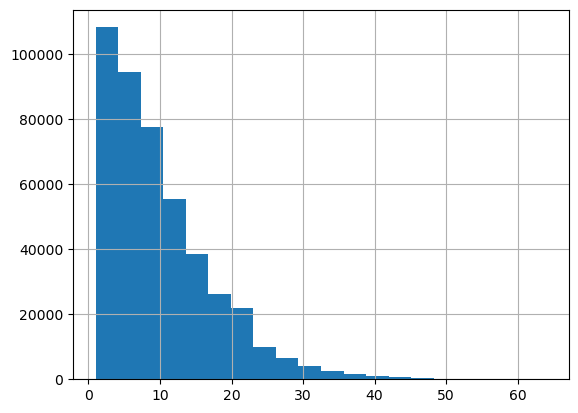

In [50]:
articles_in_one_order.hist(
    bins=20
)
plt.show()

We can observe that most people order between 1 and 15 items per order. From 16 onwards, the number of people is less significant compared to the first part.

### What are the top 20 items that are most frequently reordered?

In [51]:
# Items that have been reordered are extracted, grouped by product, and then counted.
top_prd_reord= order_products[order_products['reordered'] == 1].groupby(by='product_id').count() 
top_prd_reord

,order_id,add_to_cart_order,reordered
product_id,,,
1,158,158,158
3,31,31,31
4,25,25,25
7,1,1,1
8,6,6,6
...,...,...,...
49690,4,4,4
49691,31,31,31
49692,5,5,5


In [52]:
# The dataframes are merged to get the product names.
top_prd_reord= top_prd_reord.merge(products, on='product_id', how='left') 
top_prd_reord

,product_id,order_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,1,158,158,158,CHOCOLATE SANDWICH COOKIES,61,19
1,3,31,31,31,ROBUST GOLDEN UNSWEETENED OOLONG TEA,94,7
2,4,25,25,25,SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...,38,1
3,7,1,1,1,PURE COCONUT WATER WITH ORANGE,98,7
4,8,6,6,6,CUT RUSSET POTATOES STEAM N' MASH,116,1
...,...,...,...,...,...,...,...
36223,49690,4,4,4,HIGH PERFORMANCE ENERGY DRINK,64,7
36224,49691,31,31,31,ORIGINAL PANCAKE & WAFFLE MIX,130,14
36225,49692,5,5,5,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
36226,49693,11,11,11,SPRING WATER BODY WASH,127,11


In [53]:
# Values are sorted
top_prd_reord=top_prd_reord.sort_values(by='order_id',ascending=False) 
top_prd_reord

,product_id,order_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
18104,24852,55763,55763,55763,BANANA,24,4
9528,13176,44450,44450,44450,BAG OF ORGANIC BANANAS,24,4
15368,21137,28639,28639,28639,ORGANIC STRAWBERRIES,24,4
15936,21903,26233,26233,26233,ORGANIC BABY SPINACH,123,4
34407,47209,23629,23629,23629,ORGANIC HASS AVOCADO,24,4
...,...,...,...,...,...,...,...
5120,7092,1,1,1,MELATONIN NUTRASPRAY SUBLINGUAL ORANGE FLAVOR,6,2
15278,21003,1,1,1,WHITE CHOCOLATE MACADAMIA COFFEE CREAMER,53,16
23932,32856,1,1,1,CRAB RANGOON,129,1
31131,42727,1,1,1,CHOCOLATE LOVERS CHIPS DELUXE COOKIES,61,19


In [54]:
top_prd_reord[['product_id','product_name']].reset_index(drop='bool').head(20)

,product_id,product_name
0,24852,BANANA
1,13176,BAG OF ORGANIC BANANAS
2,21137,ORGANIC STRAWBERRIES
3,21903,ORGANIC BABY SPINACH
4,47209,ORGANIC HASS AVOCADO
5,47766,ORGANIC AVOCADO
6,27845,ORGANIC WHOLE MILK
7,47626,LARGE LEMON
8,27966,ORGANIC RASPBERRIES
9,16797,STRAWBERRIES


We can see that the products are similar to the list of the most popular products, with a few small differences in positions; however, we see the same products.

### For each product, what is the proportion of times it is ordered and re-ordered?

In [55]:
# Extract the products that were ordered for the first time.

prod_ordrd= order_products[order_products['reordered'] == 0].groupby(by='product_id').count().sort_values(by='order_id',ascending= False).reset_index()
prod_ordrd= prod_ordrd[['product_id','reordered']]
prod_ordrd.columns=['product_id','ordered']
prod_ordrd

,product_id,ordered
0,24852,10287
1,13176,8847
2,21137,8400
3,21903,7738
4,47626,6451
...,...,...
43759,28478,1
43760,23771,1
43761,13638,1
43762,21402,1


In [56]:
# Extract the products that have been ordered more than once.
prod_reordrd= order_products[order_products['reordered'] == 1].groupby(by='product_id').count().sort_values(by='order_id',ascending= False).reset_index()
prod_reordrd= prod_reordrd[['product_id','reordered']] 
prod_reordrd

,product_id,reordered
0,24852,55763
1,13176,44450
2,21137,28639
3,21903,26233
4,47209,23629
...,...,...
36223,7092,1
36224,21003,1
36225,32856,1
36226,42727,1


In [57]:
# Merge the two dataframes
reorder_proportion = prod_ordrd.merge(prod_reordrd, on='product_id')

# Perform the operation to calculate the ratio
reorder_proportion['proportion'] = reorder_proportion['reordered'] / reorder_proportion['ordered']

# Join with the 'products' dataframe to get the product name
reorder_proportion = reorder_proportion.merge(products, on='product_id')

reorder_proportion[['product_id', 'product_name', 'proportion']].head(20)

,product_id,product_name,proportion
0,24852,BANANA,5.420725
1,13176,BAG OF ORGANIC BANANAS,5.024302
2,21137,ORGANIC STRAWBERRIES,3.409405
3,21903,ORGANIC BABY SPINACH,3.390152
4,47626,LARGE LEMON,2.332042
5,26209,LIMES,2.094452
6,47209,ORGANIC HASS AVOCADO,3.845866
7,16797,STRAWBERRIES,2.296229
8,47766,ORGANIC AVOCADO,3.152203
9,39275,ORGANIC BLUEBERRIES,1.732087


The first two products have a high reorder ratio, with bananas being the top one, followed by the rest of the top 20 most sold items having a reorder proportion between 2 to 3 times.


### For each customer, what proportion of the products they ordered had they previously purchased?

In [58]:
# Merge the dataframes to get the necessary information
user_order = instacart_orders.merge(order_products, on='order_id')

# Get data on the total number of ordered items
user_total_products = user_order.groupby('user_id')['reordered'].count().reset_index()
user_reorder = user_order[user_order['reordered'] == 1].groupby('user_id')['reordered'].count().reset_index()

# Group the data and count how many times the items have been reordered
print(user_total_products)
print(user_reorder)


        user_id  reordered
0             2         26
1             4          2
2             5         12
3             6          4
4             7         14
...         ...        ...
149621   206203         27
149622   206206         21
149623   206207         46
149624   206208        125
149625   206209         25

[149626 rows x 2 columns]
        user_id  reordered
0             2          1
1             5          8
2             7         13
3            11          3
4            12          3
...         ...        ...
132986   206203          6
132987   206206         15
132988   206207         41
132989   206208         87
132990   206209          8

[132991 rows x 2 columns]


In [59]:
# Extract the desired columns
user_total_products = user_total_products[['user_id', 'reordered']]

# Rename a column for better understanding
user_total_products.columns = ['user_id', 'ordered'] 
user_reorder = user_reorder[['user_id', 'reordered']]

# Merge the dataframes
user_prdct_proportion = user_total_products.merge(user_reorder, on='user_id')

# Calculate the proportion
user_prdct_proportion['proportion'] = user_prdct_proportion['reordered'] / user_prdct_proportion['ordered']
user_prdct_proportion.sort_values(by='proportion')


,user_id,ordered,reordered,proportion
68493,106148,67,1,0.014925
130092,201663,66,1,0.015152
100199,155522,58,1,0.017241
37089,57630,57,1,0.017544
4778,7349,55,1,0.018182
...,...,...,...,...
75056,116344,3,3,1.000000
118491,183769,3,3,1.000000
75050,116337,1,1,1.000000
2906,4473,2,2,1.000000


There is a lot of variance among each of the customers' proportions.

### What are the top 20 items that people add to their carts first?


In [60]:
# Extract products that are added first to the cart and sort them
top_first_prd= order_products[order_products['add_to_cart_order'] == 1].groupby('product_id').count().sort_values(by='order_id',ascending=False).reset_index() 

# Select the columns to work with
top_first_prd= top_first_prd[['product_id','order_id']] 

# Rename the column for better understanding
top_first_prd.columns=['product_id','orders'] 
top_first_prd

,product_id,orders
0,24852,15562
1,13176,11026
2,27845,4363
3,21137,3946
4,47209,3390
...,...,...
26755,10981,1
26756,10985,1
26757,38272,1
26758,10989,1


In [61]:
# DataFrames are joined to get product names.
top_first_prd_names= top_first_prd.merge(products,on='product_id') 
top_first_prd_names

,product_id,orders,product_name,aisle_id,department_id
0,24852,15562,BANANA,24,4
1,13176,11026,BAG OF ORGANIC BANANAS,24,4
2,27845,4363,ORGANIC WHOLE MILK,84,16
3,21137,3946,ORGANIC STRAWBERRIES,24,4
4,47209,3390,ORGANIC HASS AVOCADO,24,4
...,...,...,...,...,...
26755,10981,1,CLOUD WHITE DECORATING CUPCAKE ICING,97,13
26756,10985,1,PREMIUM TWIN PACK ROCK CORNISH GAME HEN,49,12
26757,38272,1,ORGANIC RAW COCONUT FLOUR,17,13
26758,10989,1,GARBAGE DISPOSAL FRESHENER & CLEANER RED PEAR ...,114,17


In [62]:
top_first_prd_names[['product_id','product_name','orders']].head(20)

,product_id,product_name,orders
0,24852,BANANA,15562
1,13176,BAG OF ORGANIC BANANAS,11026
2,27845,ORGANIC WHOLE MILK,4363
3,21137,ORGANIC STRAWBERRIES,3946
4,47209,ORGANIC HASS AVOCADO,3390
5,21903,ORGANIC BABY SPINACH,3336
6,47766,ORGANIC AVOCADO,3044
7,19660,SPRING WATER,2336
8,16797,STRAWBERRIES,2308
9,27966,ORGANIC RASPBERRIES,2024


We continue to see the trend of bananas as the number 1 product in sales, now as the first product placed in the cart. We also notice a majority of organic products in the list, but fewer than in the best-selling products list.

### General Project Conclusion:

There is a clear observation that organic foods dominate the top-selling items. The number of products that customers typically purchase per order is not very high, with low-volume buying. The days with the most activity are generally at the beginning of the week, reaching the lowest point on Thursdays and Fridays. There's an opportunity to focus on the resurgence of customers who tend to wait nearly 30 days before placing another order. Even though there might be differences in sales across the days of the week, the number of sales at different times throughout the week remains relatively consistent.
